# Music Recommendation System

**Warnings** is used to diable useless warning thrown

In [1]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

Importing libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from scipy.sparse import csr_matrix


In [4]:
#Read userid-songid-listen_count
song_info = pd.read_csv('https://static.turi.com/datasets/millionsong/10000.txt',sep='\t',header=None)
song_info.columns = ['user_id', 'song_id', 'listen_count']


*To view first 5 rows in a file*

In [5]:
song_info.head()


,user_id,song_id,listen_count
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1


Library used to find missing values in a graph format

In [6]:
import missingno as ms

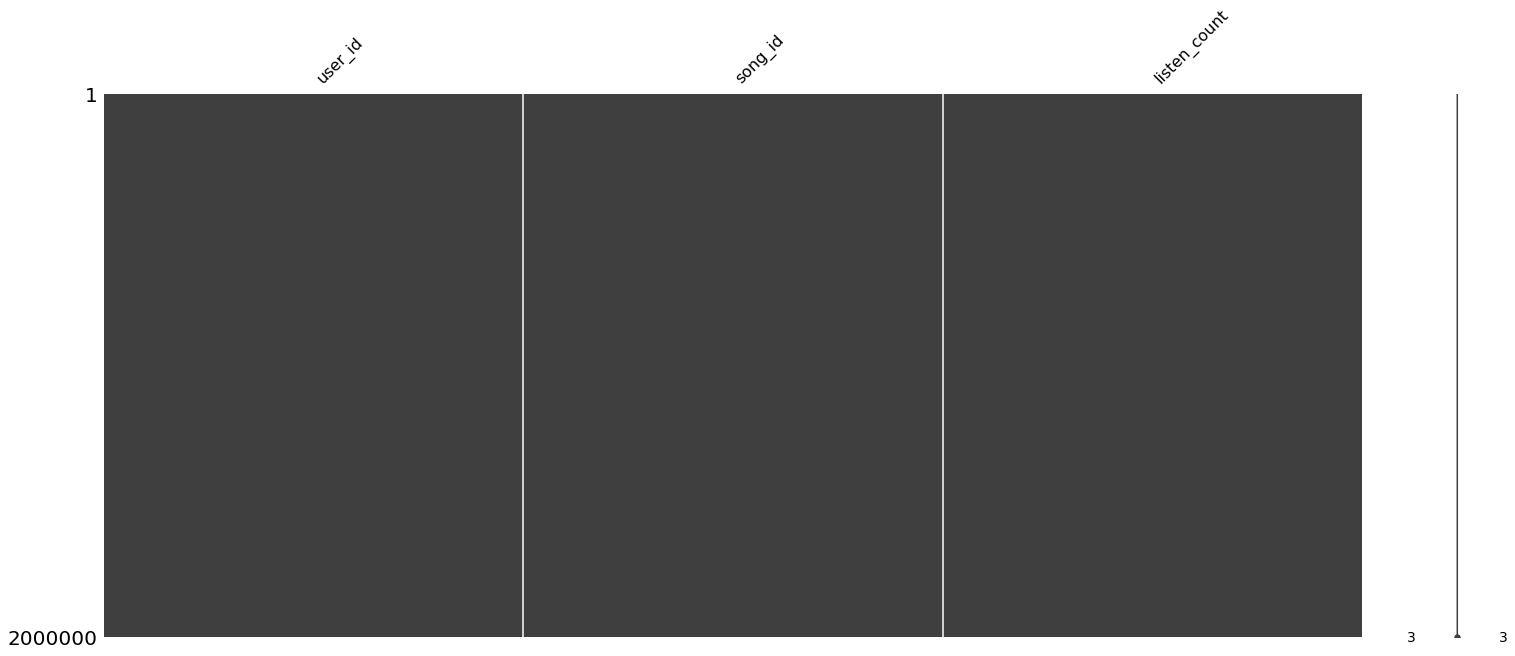

In [7]:
ms.matrix(song_info)

No missing values

In [8]:
#Read song  metadata
song_actual =  pd.read_csv('https://static.turi.com/datasets/millionsong/song_data.csv')
song_actual.drop_duplicates(['song_id'], inplace=True)

In [9]:
#Merge the two dataframes above to create input dataframe for recommender systems
songs = pd.merge(song_info, song_actual, on="song_id", how="left")

In [11]:
songs.head()

,user_id,song_id,listen_count,title,release,artist_name,year
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1,The Cove,Thicker Than Water,Jack Johnson,0
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1,Stronger,Graduation,Kanye West,2007
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1,Constellations,In Between Dreams,Jack Johnson,2005
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999


To convert the merged file into a csv file into remote

In [12]:
songs.to_csv('songs.csv', index=False)

In [13]:
df_songs = pd.read_csv('songs.csv')

### Exploring the data

As usual, any data science or machine learning project starts with an exploratory data analysis (EDA). The aim of EDA is to understand and get insights on our data.

In [14]:
df_songs.head()

,user_id,song_id,listen_count,title,release,artist_name,year
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1,The Cove,Thicker Than Water,Jack Johnson,0
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1,Stronger,Graduation,Kanye West,2007
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1,Constellations,In Between Dreams,Jack Johnson,2005
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999


In [15]:
print(df_songs.shape)

(2000000, 7)


There are 2000000 values in the dataset

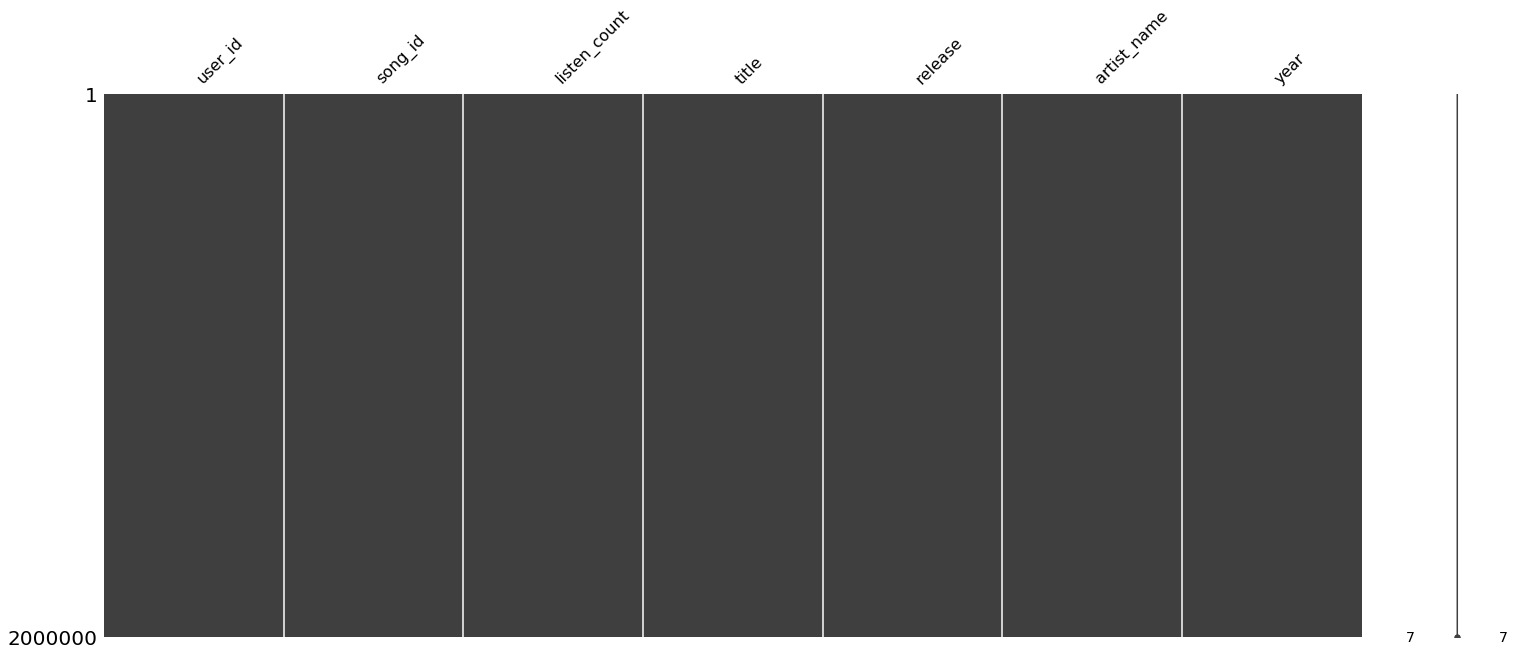

In [16]:
ms.matrix(df_songs)

In [17]:
#checking the data types of each feature
df_songs.dtypes

user_id         object
song_id         object
listen_count     int64
title           object
release         object
artist_name     object
year             int64
dtype: object

In [18]:
df_songs.describe()

,listen_count,year
count,2.000000e+06,2.000000e+06
mean,3.045485e+00,1.628645e+03
std,6.579720e+00,7.787283e+02
min,1.000000e+00,0.000000e+00
25%,1.000000e+00,1.984000e+03
50%,1.000000e+00,2.002000e+03
75%,3.000000e+00,2.007000e+03
max,2.213000e+03,2.010000e+03


Counting the number of unique songs in the dataset

In [19]:
unique_songs = df_songs['title'].unique().shape[0]
print(f"There are {unique_songs} unique songs in the dataset")

There are 9567 unique songs in the dataset


Counting the number of unique artist

In [20]:
unique_artists = df_songs['artist_name'].unique().shape[0]
print(f"There are {unique_artists} unique artists in the dataset")

There are 3375 unique artists in the dataset


Counting the unique user in the dataset

In [21]:
#Unique users
unique_users = df_songs['user_id'].unique().shape[0]
print(f"There are {unique_users} unique users in the dataset")

There are 76353 unique users in the dataset


### Determining the most popular song

In [22]:
ten_pop_songs = df_songs.groupby('title')['listen_count'].count().reset_index().sort_values(['listen_count', 'title'], ascending = [0,1])

In [23]:
ten_pop_songs['percentage']  = round(ten_pop_songs['listen_count'].div(ten_pop_songs['listen_count'].sum())*100, 2)

In [24]:
ten_pop_songs = ten_pop_songs[:10]
ten_pop_songs

,title,listen_count,percentage
6836,Sehr kosmisch,8277,0.41
8725,Undo,7032,0.35
1964,Dog Days Are Over (Radio Edit),6949,0.35
9496,You're The One,6729,0.34
6498,Revelry,6145,0.31
6825,Secrets,5841,0.29
3437,Horn Concerto No. 4 in E flat K495: II. Romanc...,5385,0.27
2595,Fireflies,4795,0.24
3322,Hey_ Soul Sister,4758,0.24
8494,Tive Sim,4548,0.23


In [25]:
labels = ten_pop_songs['title'].tolist()
counts = ten_pop_songs['listen_count'].tolist()
labels=labels[:10]
counts=counts[:10]


In [26]:
labels

['Sehr kosmisch',
 'Undo',
 'Dog Days Are Over (Radio Edit)',
 "You're The One",
 'Revelry',
 'Secrets',
 'Horn Concerto No. 4 in E flat K495: II. Romance (Andante cantabile)',
 'Fireflies',
 'Hey_ Soul Sister',
 'Tive Sim']

In [27]:
counts

[8277, 7032, 6949, 6729, 6145, 5841, 5385, 4795, 4758, 4548]

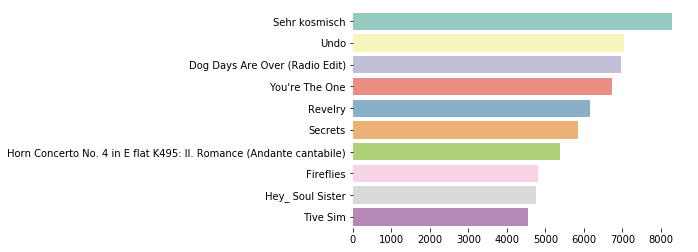

In [28]:
plt.figure()
sns.barplot(x=counts, y=labels, palette='Set3')
sns.despine(left=True, bottom=True)

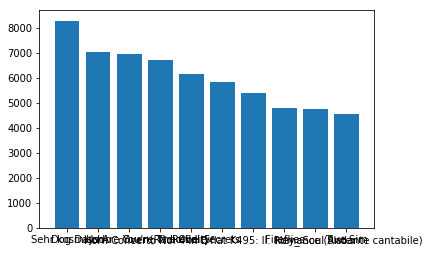

In [29]:
plt.bar(labels,counts)
plt.show()

### Most popular artist

In [31]:
ten_pop_artists  = df_songs.groupby(['artist_name'])['listen_count'].count().reset_index().sort_values(['listen_count', 'artist_name'], 
                                                                                                ascending = [0,1])

In [32]:
ten_pop_artists = ten_pop_artists[:10]
ten_pop_artists

,artist_name,listen_count
649,Coldplay,29422
2850,The Black Keys,19862
1651,Kings Of Leon,18747
1107,Florence + The Machine,18112
1370,Jack Johnson,17801
2946,The Killers,16063
2374,Radiohead,14890
736,Daft Punk,14715
2073,Muse,14005
1554,Justin Bieber,13959


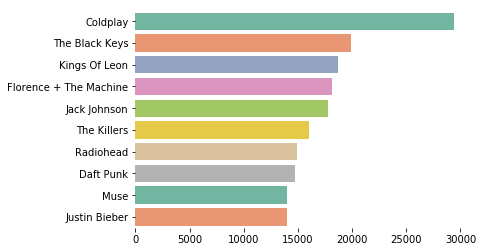

In [33]:
plt.figure()
labels = ten_pop_artists['artist_name'].tolist()
counts = ten_pop_artists['listen_count'].tolist()
sns.barplot(x=counts, y=labels, palette='Set2')
sns.despine(left=True, bottom=True)

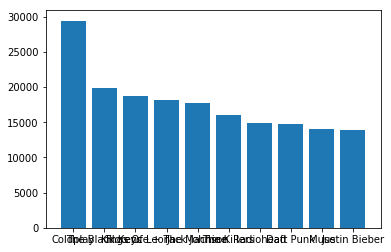

In [34]:
plt.bar(labels,counts)
plt.show()


What was the maximum time the same user listen to a same song?

In [35]:

listen_counts = pd.DataFrame(df_songs.groupby('listen_count').size(), columns=['count'])

In [36]:
df_songs.head()

,user_id,song_id,listen_count,title,release,artist_name,year
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1,The Cove,Thicker Than Water,Jack Johnson,0
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1,Stronger,Graduation,Kanye West,2007
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1,Constellations,In Between Dreams,Jack Johnson,2005
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999


In [37]:
listen_counts

,count
listen_count,
1,1138433
2,313043
3,142933
4,82569
5,93136
6,45632
7,30920
8,22544
9,16753


In [38]:
print(f"The maximum time the same user listened to the same songs was: {listen_counts.reset_index(drop=False)['listen_count'].iloc[-1]}")

The maximum time the same user listened to the same songs was: 2213



How many times on average the same user listen to a same song?

In [39]:
print(f"On average, a user listen to the same song {df_songs['listen_count'].mean()} times")

On average, a user listen to the same song 3.0454845 times



We can also check the distribution of listen_count:

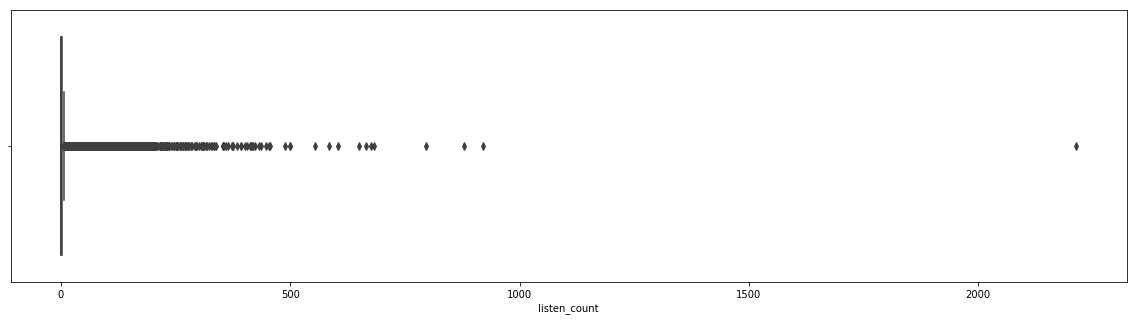

In [40]:

plt.figure(figsize=(20, 5))
sns.boxplot(x='listen_count', data=df_songs)

How many songs does a user listen in average?

In [41]:
song_user = df_songs.groupby('user_id')['song_id'].count()

In [42]:
df_songs.head()


,user_id,song_id,listen_count,title,release,artist_name,year
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1,The Cove,Thicker Than Water,Jack Johnson,0
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1,Stronger,Graduation,Kanye West,2007
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1,Constellations,In Between Dreams,Jack Johnson,2005
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999


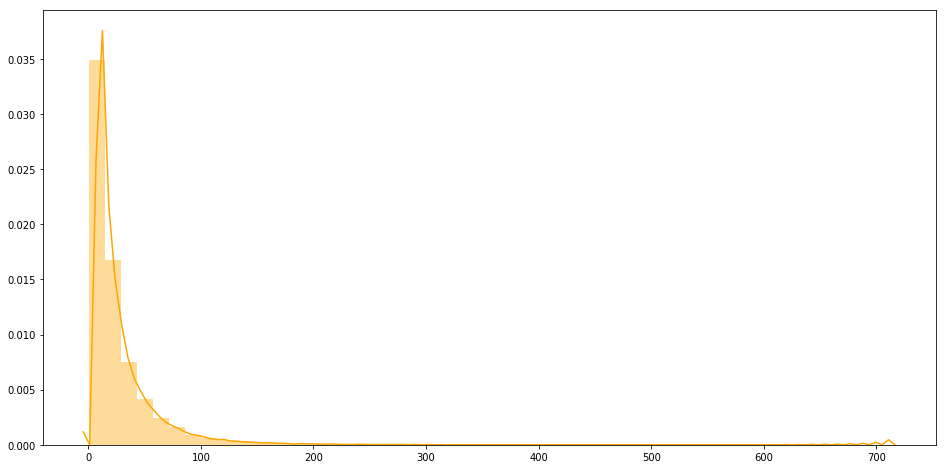

In [43]:
plt.figure(figsize=(16, 8))
sns.distplot(song_user.values, color='orange')

In [44]:
song_user

user_id
00003a4459f33b92906be11abe0e93efc423c0ff      7
00005c6177188f12fb5e2e82cdbd93e8a3f35e64      5
00030033e3a2f904a48ec1dd53019c9969b6ef1f      9
0007235c769e610e3d339a17818a5708e41008d9     10
0007c0e74728ca9ef0fe4eb7f75732e8026a278b      9
000a5c8b4d8b2c98f7a205219181d039edcd4506     14
000b474f815bcff17a4bc9ce5324f9352dafe07d     11
000b4e4134d5f77d7608fbf86fb3e1adac4478a8      5
000b9a54ef0560b957ee0f7a4cb933c36025e600      5
000d2df2cb8ad7300f89512f8fe8fadc4f99e733     10
000e2c2a8c7870ff9121f212b35c8b3a20cc0e67     57
000ebc858861aca26bac9b49f650ed424cf882fc     94
000ef25cc955ad5841c915d269432eea41f4a1a5     47
00125672fad06bc57f5a4304cceea9effab07839     11
0012bf75d43a724f62dc746d9e85ae0088a3a1d6     33
001322829b5dc3edc59bf78189617ddd8f23c82a     43
0013e651c18f10396ad1125d5d1c894b0224bb1f      8
00185e316f07f0f00c325ca034be59c15b362401    115
00191b9eed5b189312742c1b520f6f5b3191e923      3
0019740e3e8c24e223a6f88e3faa7c144ec5a014     24
001993ee79f507acf9a6655847e4111e

In [45]:
print(f"A user listens to an average of {np.mean(song_user)} songs")

A user listens to an average of 26.194124657839247 songs


In [46]:

print(f"A user listens with minimum {np.min(song_user)} and maximum {np.max(song_user)} songs")

A user listens with minimum 1 and maximum 711 songs


We can see that a user listens in average to 27 songs. Even the maximum amount of songs listen by an user is 711, and we have 9567 songs in our dataset.

So, not all user listen to all songs, so a lot of values in the song x users matrix are going to be zero. Thus, we’ll be dealing with extremely sparse data.

How sparse? Let's check that:

In [47]:
unique_users

76353

In [48]:
unique_songs


9567

Get how many values should it be if all songs have been listen by all users

In [49]:
values_matrix = unique_users * unique_songs

Substract the total values with the actural shape of the DataFrame songs

In [50]:
zero_values_matrix = values_matrix - df_songs.shape[0]

In [51]:
print(f"The matrix of users x songs has {zero_values_matrix} values that are zero")

The matrix of users x songs has 728469151 values that are zero



Dealing with such a sparse matrix, we'll take a lot of memory and resources. To make our life easier, let's just select all those users that have listened to at least 16 songs.

In [52]:
# Get users which have listen to at least 16 songs
song_ten_id = song_user[song_user > 16].to_list()

AttributeError: 'Series' object has no attribute 'to_list'

In [53]:
# Get users which have listen to at least 16 songs
song_ten_id = song_user[song_user > 16].index.tolist()


In [54]:
# Filtered the dataset to keep only those users with more than 16 listened
df_song_id_more_ten = df_songs[df_songs['user_id'].isin(song_ten_id)].reset_index(drop=True)

In [55]:
df_song_id_more_ten.head()

,user_id,song_id,listen_count,title,release,artist_name,year
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1,The Cove,Thicker Than Water,Jack Johnson,0
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1,Stronger,Graduation,Kanye West,2007
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1,Constellations,In Between Dreams,Jack Johnson,2005
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999


In [56]:
df_song_id_more_ten.count()

user_id         1635302
song_id         1635302
listen_count    1635302
title           1635302
release         1635302
artist_name     1635302
year            1635302
dtype: int64


We need now to work with a scipy-sparse matrix to avoid overflow and wasted memory. For that purpose, we'll use the csr_matrix function from scipy.sparse.

The pivot() function is used to reshaped a given DataFrame organized by given index / column values. This function does not support data aggregation, multiple values will result in a MultiIndex in the columns.

In [57]:
df_songs_features = df_song_id_more_ten.pivot(index='song_id', columns='user_id', values='listen_count').fillna(0)

In [58]:
mat_songs_features = csr_matrix(df_songs_features.values)

In [59]:
df_songs_features.head()

user_id,000e2c2a8c7870ff9121f212b35c8b3a20cc0e67,000ebc858861aca26bac9b49f650ed424cf882fc,000ef25cc955ad5841c915d269432eea41f4a1a5,0012bf75d43a724f62dc746d9e85ae0088a3a1d6,001322829b5dc3edc59bf78189617ddd8f23c82a,00185e316f07f0f00c325ca034be59c15b362401,0019740e3e8c24e223a6f88e3faa7c144ec5a014,001b005fe5e80d3cb45f320f5658fc8e2e72794e,001f22c638730aed5659034c447d3cf0e658898e,0021d9a4628624f6d70237f9c200ab82e766bf26,...,fff300cd094fe04030b79fae550dc9d065190182,fff4676dacb2e9a7217702f62ee70e88aa512ecc,fff4e1a7dacbe9c13051c08f09bf66d76cbee35e,fff543db7918cb8f4f56f7470903eb2f1d5a6dd8,fff6c30c773e6ffafcac213c9afd9666afaf6d63,fffb701ee87a32eff67eb040ed59146121f01571,fffc0df75a48d823ad5abfaf2a1ee61eb1e3302c,fffce9c1537fbc350ea68823d956eaa8f5236dbe,fffd9635b33f412de8ed02e44e6564e3644cf3c6,fffea3d509760c984e7d40789804c0e5e289cc86
song_id,,,,,,,,,,,,,,,,,,,,,
SOAAAGQ12A8C1420C8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SOAACPJ12A81C21360,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SOAACSG12AB018DC80,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SOAAEJI12AB0188AB5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SOAAFAC12A67ADF7EB,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Because the system will output the id of the song, instead of the title, we'll make a function that maps those indices with the song title.

In [60]:

df_unique_songs = df_songs.drop_duplicates(subset=['song_id']).reset_index(drop=True)[['song_id', 'title']]

In [61]:

decode_id_song = {
    song: i for i, song in 
    enumerate(list(df_unique_songs.set_index('song_id').loc[df_songs_features.index].title))
}

In [62]:
df_unique_songs

,song_id,title
0,SOAKIMP12A8C130995,The Cove
1,SOBBMDR12A8C13253B,Entre Dos Aguas
2,SOBXHDL12A81C204C0,Stronger
3,SOBYHAJ12A6701BF1D,Constellations
4,SODACBL12A8C13C273,Learn To Fly
5,SODDNQT12A6D4F5F7E,Apuesta Por El Rock 'N' Roll
6,SODXRTY12AB0180F3B,Paper Gangsta
7,SOFGUAY12AB017B0A8,Stacked Actors
8,SOFRQTD12A81C233C0,Sehr kosmisch
9,SOHQWYZ12A6D4FA701,Heaven's gonna burn your eyes


In [63]:
decode_id_song

{'Orgelblut': 0,
 'Cearc Agus Coileach / The Hen And Cock': 1,
 'I Gotta Feeling (Edit)': 2,
 'Godlovesugly': 3,
 "Rome Wasn't Built In A Day": 4,
 'Jesus Loves You (Album Version)': 5,
 'End Of The World Party': 6,
 'So Confused (feat. Butta Creame) (amended album version)': 7,
 'Stay Awhile': 8,
 'Nomenclature': 9,
 'Criminal': 7225,
 'Juke Box Hero (Remastered LP Version )': 11,
 'Aunt Eggma Blowtorch': 12,
 'Radio': 13,
 "Love Don't Live Here Anymore": 14,
 'My Shepherd (Psalms 23) (featuring Kurt Carr & Avalon)': 15,
 'STARSTRUKK [FEATURINGKATYPERRY] (Explicit Bonus Version)': 16,
 'Hallelujah (Album Version)': 17,
 'Brand New Day': 5415,
 'Psycho': 19,
 'Shadow Of The Day (Album Version)': 20,
 'Back Against The Wall': 21,
 'Halo': 52,
 'Mass Appeal (Explicit)': 23,
 'The Canals Of Our City': 24,
 'Public Service Announcement (Interlude)': 25,
 'The Drying of the Lawns': 26,
 "You'll Never Know (Live Version)": 27,
 "Who's That Girl (Soundtrack Album Version)": 28,
 'A Pain That 

## Recomendation

In [64]:
from sklearn.neighbors import NearestNeighbors

In [65]:
model = NearestNeighbors(metric='cosine', algorithm='brute')

In [66]:
model.fit(mat_songs_features)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
         metric_params=None, n_jobs=None, n_neighbors=5, p=2, radius=1.0)

In [67]:
df_songs_features.head()

user_id,000e2c2a8c7870ff9121f212b35c8b3a20cc0e67,000ebc858861aca26bac9b49f650ed424cf882fc,000ef25cc955ad5841c915d269432eea41f4a1a5,0012bf75d43a724f62dc746d9e85ae0088a3a1d6,001322829b5dc3edc59bf78189617ddd8f23c82a,00185e316f07f0f00c325ca034be59c15b362401,0019740e3e8c24e223a6f88e3faa7c144ec5a014,001b005fe5e80d3cb45f320f5658fc8e2e72794e,001f22c638730aed5659034c447d3cf0e658898e,0021d9a4628624f6d70237f9c200ab82e766bf26,...,fff300cd094fe04030b79fae550dc9d065190182,fff4676dacb2e9a7217702f62ee70e88aa512ecc,fff4e1a7dacbe9c13051c08f09bf66d76cbee35e,fff543db7918cb8f4f56f7470903eb2f1d5a6dd8,fff6c30c773e6ffafcac213c9afd9666afaf6d63,fffb701ee87a32eff67eb040ed59146121f01571,fffc0df75a48d823ad5abfaf2a1ee61eb1e3302c,fffce9c1537fbc350ea68823d956eaa8f5236dbe,fffd9635b33f412de8ed02e44e6564e3644cf3c6,fffea3d509760c984e7d40789804c0e5e289cc86
song_id,,,,,,,,,,,,,,,,,,,,,
SOAAAGQ12A8C1420C8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SOAACPJ12A81C21360,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SOAACSG12AB018DC80,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SOAAEJI12AB0188AB5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SOAAFAC12A67ADF7EB,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [68]:
df_songs_features.shape

(10000, 36561)

In [69]:
query=np.random.choice(df_songs_features.shape[0])

In [70]:
print(query)

6823


In [71]:
distances, indices=model.kneighbors(df_songs_features.iloc[query, :].values.reshape(1,-1), n_neighbors=10)

In [72]:
for i in range(0, len(distances.flatten())):
    if(i==0):
        print("Recommendation for {0}:\n".format(df_songs_features.index))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i,df_songs_features.index[indices.flatten()[i]], distances.flatten()[i]))
        

Recommendation for Index(['SOAAAGQ12A8C1420C8', 'SOAACPJ12A81C21360', 'SOAACSG12AB018DC80',
       'SOAAEJI12AB0188AB5', 'SOAAFAC12A67ADF7EB', 'SOAAFYH12A8C13717A',
       'SOAAJMQ12A6D4F7D17', 'SOAAKPM12A58A77210', 'SOAALWN12A6D4F7FDA',
       'SOAAMOW12AB018149B',
       ...
       'SOZZKPR12A6D4F8147', 'SOZZLTY12A67AE0AD0', 'SOZZLZN12A8AE48D6D',
       'SOZZRHE12A6702165F', 'SOZZTCU12AB0182C58', 'SOZZTNF12A8C139916',
       'SOZZVWB12AB0189C30', 'SOZZWZV12A67AE140F', 'SOZZYAO12A6701FF36',
       'SOZZZPV12A8C1444B5'],
      dtype='object', name='song_id', length=10000):

1: SOAOSNO12A6D4FA76F, with distance of 0.5044995142642044:
2: SOZBNFQ12A6701F07E, with distance of 0.5253724834786455:
3: SOBSSGV12AB0189587, with distance of 0.6780365169705866:
4: SOSZLKZ12A679AE56A, with distance of 0.7433926269925353:
5: SOTEGHN12A58A7DB86, with distance of 0.7445703439507392:
6: SOQPIDC12A58A7CC60, with distance of 0.7948846113272446:
7: SOCEWMO12A8151CBDE, with distance of 0.8036853864724885: